# 一、课堂示例代码复刻

## （一）数据准备

In [1]:
import pandas as pd 
df = pd.read_excel(r'E:\[- -] C\文本数据分析\text_analysis_ad.xlsx', index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [2]:
# 分词
import jieba # 中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['广告文本'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\BITTER~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.435 seconds.
Prefix dict has been built successfully.


'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [3]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


In [4]:
#词向量模型示例
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [5]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() #切分词语
for document in corpus[:5]:
    print(document)#看前五个切分好的词语

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

## （二）训练词嵌入模型

In [6]:
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [7]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

之: [-0.889774    1.080743    0.44297534 -0.10541065 -0.42678106 -2.098759
  0.96546394  2.8628345  -1.2388134  -1.1980429  -0.4854525  -1.9852768
 -0.0553413   1.0882095   0.7003236  -0.8061846   0.5143035  -0.71634954
 -0.16661125 -2.2424877   0.9794026  -0.06196782  0.6633914  -0.7220005
 -0.17048702  0.18652777 -0.4580284  -0.8982077  -0.86636114 -0.26050955
  0.9671792   0.6099147   0.14565696 -0.85287964 -0.77133024  1.6573277
  0.57418674 -0.9512027  -1.3513942  -2.3702111   0.03658567 -0.56222725
 -0.08476942 -0.85433596  1.0962502  -0.80553216 -1.4482538   0.4662207
  1.2405776   0.7807985   0.12536193 -0.5047457  -0.902766   -0.066644
 -0.7040732   0.80094916  0.22255854 -0.0489422  -0.82478327  0.43271795
  0.5149807   0.4215039  -0.2612095   0.51356035 -0.98364073  1.3445678
  0.09113867  0.9789492  -1.4296755   1.5436481  -0.65007156  1.3779994
  0.63580143 -0.25324988  1.6207461   0.20118633  0.15630098 -0.1911092
 -0.600535    0.5880952  -0.48218882  0.2101354  -1.0456945

In [8]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.7211741
0.69095075
0.6149455
0.9974308
0.98431456
0.9913986


## （三）可视化

In [9]:
#创建向量
words = ['医生','疼痛','神经','伤风']
vectors = [model.wv[word] for word in words]

In [10]:
#进行语义空间降维，用于展示词语在二维空间的相对位置
from sklearn.decomposition import PCA
#使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

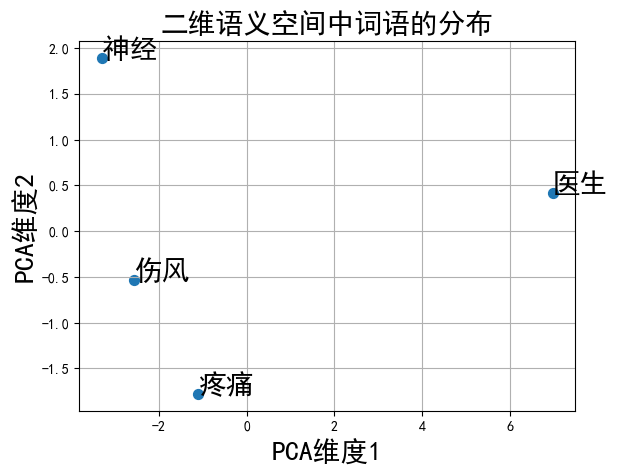

In [11]:
#画图
import matplotlib.pyplot as plt

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [12]:
#训练Word2Vec模型期间调用以监视训练过程
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
#callback的自定义回调类，实现了on_epoch_end方法，在每次训练周期结束后调用。可以计算并打印该周期的模型损失，跟踪了当前周期数和前一个周期的损失。

In [13]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 78569.7890625
Loss after epoch 1: 78154.9765625
Loss after epoch 2: 64998.03125
Loss after epoch 3: 62508.078125
Loss after epoch 4: 54991.71875
Loss after epoch 5: 51565.0
Loss after epoch 6: 49364.5625
Loss after epoch 7: 41787.875
Loss after epoch 8: 46203.59375
Loss after epoch 9: 44936.3125
Loss after epoch 10: 37938.25
Loss after epoch 11: 42239.6875
Loss after epoch 12: 40511.5
Loss after epoch 13: 35272.5
Loss after epoch 14: 33594.6875
Loss after epoch 15: 37504.25
Loss after epoch 16: 36942.1875
Loss after epoch 17: 35330.75
Loss after epoch 18: 34520.375
Loss after epoch 19: 33382.125
Loss after epoch 20: 32512.875
Loss after epoch 21: 28649.3125
Loss after epoch 22: 27095.875
Loss after epoch 23: 27253.6875
Loss after epoch 24: 25621.125
Loss after epoch 25: 24933.125
Loss after epoch 26: 25367.625
Loss after epoch 27: 24071.875
Loss after epoch 28: 23596.125
Loss after epoch 29: 23940.125
Loss after epoch 30: 22505.0
Loss after epoch 31: 22427.25
Loss a

# 二、语料库探索

## （一）数据准备

In [14]:
df_corpus = pd.read_csv(r'E:\- _ - S\我的好大儿\裁判文书超大素材\2019\2019-02.csv')

In [16]:
df_corpus

,标题,审理法院,案件类型,网页链接,案号,审理程序,裁判日期,发布日期,文书内容,当事人,案由,法律依据,裁判年份,裁判月份,来源
0,熊某与杜亮、杜元竹机动车交通事故责任纠纷一审民事判决书,宜宾县人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2018）川1521民初4008号,民事一审,2019-02-16,2019-04-30,四川省宜宾市叙州区人民法院 民 事 判 决 书 （2018）川1521民初4008号 原告...,熊某；杜亮；杜元竹；中国人民财产保险股份有限公司南充市分公司,机动车交通事故责任纠纷,《中华人民共和国侵权责任法》:第十六条；《中华人民共和国侵权责任法》:第四十八条；《中华人民...,2019,2,公众号: 大邓和他的Python
1,穆奕行与穆文权婚姻家庭纠纷一案一审执行裁定书,河南省郑州市二七区人民法院,执行案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）豫0103执1110号,执行实施,2019-02-21,2019-07-15,文书内容河南省郑州市二七区人民法院执 行 裁 定 书（2019）豫0103执1110号申请人...,穆奕行；穆文权,婚姻家庭纠纷,《中华人民共和国民事诉讼法》:第一百五十四条第一款第十一项；《中华人民共和国民事诉讼法》:第...,2019,2,公众号: 大邓和他的Python
2,(2019)豫1325民初396号民事裁定书,内乡县人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）豫1325民初396号,民事一审,2019-02-01,2019-02-25,NaN,张生恩；杨红彩；,离婚纠纷,NaN,2019,2,公众号: 大邓和他的Python
3,杨天荣调解书,信阳市平桥区人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2018）豫1503民初6935号,民事一审,2019-02-20,2019-03-04,NaN,胡朝忠；杨天荣；陈炳华；合肥达美建筑装饰工程有限责任公司；,建设工程施工合同纠纷,NaN,2019,2,公众号: 大邓和他的Python
4,马何仁与任兵连追偿权纠纷一审民事裁定书,佳县人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）陕0828民初125号,民事一审,2019-02-13,2019-02-28,陕西省佳县人民法院 民 事 裁 定 书 （2019）陕0828民初125号 原告：马何仁...,马何仁；任兵连,追偿权纠纷,《中华人民共和国民事诉讼法》:第一百四十五条第一款,2019,2,公众号: 大邓和他的Python
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212408,吴欣、惠州市大亚湾庆祥实业有限公司商品房预售合同纠纷民事一审民事判决书,惠州市大亚湾经济技术开发区人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2018）粤1391民初2522号,民事一审,2019-02-21,2021-09-15,广东省惠州市大亚湾经济技术开发区人民法院民 事 判 决 书（2018）粤1391民初2522...,吴欣；惠州市大亚湾庆祥实业有限公司,商品房预售合同纠纷,《中华人民共和国合同法》:第五十四条第二款；《中华人民共和国合同法》:第六十条第一款；《中华...,2019,2,公众号: 大邓和他的Python
212409,黄平、合肥建工金鸟集团有限公司借款合同纠纷首次执行执行通知书,合肥市庐阳区人民法院,执行案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）皖0103执965号,执行实施,2019-02-01,2021-09-29,安徽省合肥市庐阳区人民法院执 行 通 知 书（2019）皖0103执965号合肥建工金鸟集团...,黄平；合肥建工金鸟集团有限公司,借款合同纠纷,《中华人民共和国民事诉讼法》:第二百四十条；《中华人民共和国民事诉讼法》:第二百五十三条；《...,2019,2,公众号: 大邓和他的Python
212410,临河区建华副食批发部与杭锦后旗虹元商贸有限责任公司、刘某买卖合同纠纷二审民事判决书,内蒙古自治区巴彦淖尔市中级人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）内08民终59号,民事二审,2019-02-25,2021-08-31,内蒙古自治区巴彦淖尔市中级人民法院民事判决书（2019）内08民终59号上诉人（原审原告）：...,临河区建华副食批发部；杭锦后旗虹元商贸有限责任公司；刘某,买卖合同纠纷,《中华人民共和国民事诉讼法》:第一百七十条第一款第二项,2019,2,公众号: 大邓和他的Python
212411,曹某与国网甘肃省电力公司张掖供电公司房屋租赁合同纠纷二审民事判决书,张掖市中级人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）甘07民终178号,民事二审,2019-02-21,2021-09-03,甘肃省张掖市中级人民法院民事判决书（2019）甘07民终178号上诉人（一审被告）：曹某，女...,曹某；国网甘肃省电力公司张掖供电公司,房屋租赁合同纠纷,《中华人民共和国民事诉讼法》:第一百七十条第一款第一项,2019,2,公众号: 大邓和他的Python


In [17]:
#去掉文书内容为空的行
df_corpus = df_corpus.dropna(subset=['文书内容'])
df_corpus

,标题,审理法院,案件类型,网页链接,案号,审理程序,裁判日期,发布日期,文书内容,当事人,案由,法律依据,裁判年份,裁判月份,来源
0,熊某与杜亮、杜元竹机动车交通事故责任纠纷一审民事判决书,宜宾县人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2018）川1521民初4008号,民事一审,2019-02-16,2019-04-30,四川省宜宾市叙州区人民法院 民 事 判 决 书 （2018）川1521民初4008号 原告...,熊某；杜亮；杜元竹；中国人民财产保险股份有限公司南充市分公司,机动车交通事故责任纠纷,《中华人民共和国侵权责任法》:第十六条；《中华人民共和国侵权责任法》:第四十八条；《中华人民...,2019,2,公众号: 大邓和他的Python
1,穆奕行与穆文权婚姻家庭纠纷一案一审执行裁定书,河南省郑州市二七区人民法院,执行案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）豫0103执1110号,执行实施,2019-02-21,2019-07-15,文书内容河南省郑州市二七区人民法院执 行 裁 定 书（2019）豫0103执1110号申请人...,穆奕行；穆文权,婚姻家庭纠纷,《中华人民共和国民事诉讼法》:第一百五十四条第一款第十一项；《中华人民共和国民事诉讼法》:第...,2019,2,公众号: 大邓和他的Python
4,马何仁与任兵连追偿权纠纷一审民事裁定书,佳县人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）陕0828民初125号,民事一审,2019-02-13,2019-02-28,陕西省佳县人民法院 民 事 裁 定 书 （2019）陕0828民初125号 原告：马何仁...,马何仁；任兵连,追偿权纠纷,《中华人民共和国民事诉讼法》:第一百四十五条第一款,2019,2,公众号: 大邓和他的Python
5,葛宜翠、张应海民间借贷纠纷二审民事判决书,安徽省合肥市中级人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）皖01民终925号,民事二审,2019-02-27,2019-03-25,安徽省合肥市中级人民法院民 事 判 决 书（2019）皖01民终925号上诉人（原审被告）：...,葛宜翠；张应海,民间借贷纠纷,《中华人民共和国民事诉讼法》:第一百七十条第一款第二项,2019,2,公众号: 大邓和他的Python
7,中国平安财产保险股份有限公司与周建军保证保险合同纠纷一审民事判决书,余姚市人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）浙0281民初674号,民事一审,2019-02-25,2019-04-23,浙江省余姚市人民法院 民 事 判 决 书 （2019）浙0281民初674号 原告：中国...,中国平安财产保险股份有限公司；周建军,保证保险合同纠纷,《中华人民共和国保险法（2015年修正）》:第四十五条；《中华人民共和国民事诉讼法》:第一百...,2019,2,公众号: 大邓和他的Python
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212408,吴欣、惠州市大亚湾庆祥实业有限公司商品房预售合同纠纷民事一审民事判决书,惠州市大亚湾经济技术开发区人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2018）粤1391民初2522号,民事一审,2019-02-21,2021-09-15,广东省惠州市大亚湾经济技术开发区人民法院民 事 判 决 书（2018）粤1391民初2522...,吴欣；惠州市大亚湾庆祥实业有限公司,商品房预售合同纠纷,《中华人民共和国合同法》:第五十四条第二款；《中华人民共和国合同法》:第六十条第一款；《中华...,2019,2,公众号: 大邓和他的Python
212409,黄平、合肥建工金鸟集团有限公司借款合同纠纷首次执行执行通知书,合肥市庐阳区人民法院,执行案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）皖0103执965号,执行实施,2019-02-01,2021-09-29,安徽省合肥市庐阳区人民法院执 行 通 知 书（2019）皖0103执965号合肥建工金鸟集团...,黄平；合肥建工金鸟集团有限公司,借款合同纠纷,《中华人民共和国民事诉讼法》:第二百四十条；《中华人民共和国民事诉讼法》:第二百五十三条；《...,2019,2,公众号: 大邓和他的Python
212410,临河区建华副食批发部与杭锦后旗虹元商贸有限责任公司、刘某买卖合同纠纷二审民事判决书,内蒙古自治区巴彦淖尔市中级人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）内08民终59号,民事二审,2019-02-25,2021-08-31,内蒙古自治区巴彦淖尔市中级人民法院民事判决书（2019）内08民终59号上诉人（原审原告）：...,临河区建华副食批发部；杭锦后旗虹元商贸有限责任公司；刘某,买卖合同纠纷,《中华人民共和国民事诉讼法》:第一百七十条第一款第二项,2019,2,公众号: 大邓和他的Python
212411,曹某与国网甘肃省电力公司张掖供电公司房屋租赁合同纠纷二审民事判决书,张掖市中级人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）甘07民终178号,民事二审,2019-02-21,2021-09-03,甘肃省张掖市中级人民法院民事判决书（2019）甘07民终178号上诉人（一审被告）：曹某，女...,曹某；国网甘肃省电力公司张掖供电公司,房屋租赁合同纠纷,《中华人民共和国民事诉讼法》:第一百七十条第一款第一项,2019,2,公众号: 大邓和他的Python


In [20]:
#数据太大，把数据换小一点
new_df = df_corpus.iloc[:200]

In [21]:
#进行分词
new_df['文书内容分词'] = new_df['文书内容'].apply(clean_text)
new_df

C:\Users\bittersweet\AppData\Local\Temp\ipykernel_38392\1866817006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['文书内容分词'] = new_df['文书内容'].apply(clean_text)


,标题,审理法院,案件类型,网页链接,案号,审理程序,裁判日期,发布日期,文书内容,当事人,案由,法律依据,裁判年份,裁判月份,来源,文书内容分词
0,熊某与杜亮、杜元竹机动车交通事故责任纠纷一审民事判决书,宜宾县人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2018）川1521民初4008号,民事一审,2019-02-16,2019-04-30,四川省宜宾市叙州区人民法院 民 事 判 决 书 （2018）川1521民初4008号 原告...,熊某；杜亮；杜元竹；中国人民财产保险股份有限公司南充市分公司,机动车交通事故责任纠纷,《中华人民共和国侵权责任法》:第十六条；《中华人民共和国侵权责任法》:第四十八条；《中华人民...,2019,2,公众号: 大邓和他的Python,四川省 宜宾市 叙州区 人民法院 民 事 判 决 书 （ 201...
1,穆奕行与穆文权婚姻家庭纠纷一案一审执行裁定书,河南省郑州市二七区人民法院,执行案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）豫0103执1110号,执行实施,2019-02-21,2019-07-15,文书内容河南省郑州市二七区人民法院执 行 裁 定 书（2019）豫0103执1110号申请人...,穆奕行；穆文权,婚姻家庭纠纷,《中华人民共和国民事诉讼法》:第一百五十四条第一款第十一项；《中华人民共和国民事诉讼法》:第...,2019,2,公众号: 大邓和他的Python,文书 内容 河南省 郑州市 二七区 人民法院 执 行 裁 定 书 （ 201...
4,马何仁与任兵连追偿权纠纷一审民事裁定书,佳县人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）陕0828民初125号,民事一审,2019-02-13,2019-02-28,陕西省佳县人民法院 民 事 裁 定 书 （2019）陕0828民初125号 原告：马何仁...,马何仁；任兵连,追偿权纠纷,《中华人民共和国民事诉讼法》:第一百四十五条第一款,2019,2,公众号: 大邓和他的Python,陕西省 佳县 人民法院 民 事 裁 定 书 （ 2019 ）...
5,葛宜翠、张应海民间借贷纠纷二审民事判决书,安徽省合肥市中级人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）皖01民终925号,民事二审,2019-02-27,2019-03-25,安徽省合肥市中级人民法院民 事 判 决 书（2019）皖01民终925号上诉人（原审被告）：...,葛宜翠；张应海,民间借贷纠纷,《中华人民共和国民事诉讼法》:第一百七十条第一款第二项,2019,2,公众号: 大邓和他的Python,安徽省 合肥市 中级 人民法院 民 事 判 决 书 （ 2019 ） 皖 0...
7,中国平安财产保险股份有限公司与周建军保证保险合同纠纷一审民事判决书,余姚市人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）浙0281民初674号,民事一审,2019-02-25,2019-04-23,浙江省余姚市人民法院 民 事 判 决 书 （2019）浙0281民初674号 原告：中国...,中国平安财产保险股份有限公司；周建军,保证保险合同纠纷,《中华人民共和国保险法（2015年修正）》:第四十五条；《中华人民共和国民事诉讼法》:第一百...,2019,2,公众号: 大邓和他的Python,浙江省 余姚市 人民法院 民 事 判 决 书 （ 2019 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,中国人民财产保险股份有限公司金华市分公司、浙江左开右开门业有限公司财产保险合同纠纷二审民事判决书,浙江省金华市中级人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2018）浙07民终6343号,民事二审,2019-02-15,2019-03-04,浙江省金华市中级人民法院 民 事 判 决 书 （2018）浙07民终6343号 上诉人（原...,浙江左开右开门业有限公司；中国人民财产保险股份有限公司金华市分公司,财产保险合同纠纷,《中华人民共和国民事诉讼法》:第一百七十条第一款第一项,2019,2,公众号: 大邓和他的Python,浙江省 金华市 中级 人民法院 民 事 判 决 书 （ 2018...
284,金彩英与陈国荣、李惠平民间借贷纠纷二审民事判决书,江苏省苏州市中级人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2018）苏05民终11015号,民事二审,2019-02-14,2019-06-04,江苏省苏州市中级人民法院民 事 判 决 书（2018）苏05民终11015号上诉人（原审被告...,金彩英；陈国荣；李惠平,民间借贷纠纷,《中华人民共和国民事诉讼法》:第一百七十条第一款第一项,2019,2,公众号: 大邓和他的Python,江苏省 苏州市 中级 人民法院 民 事 判 决 书 （ 2018 ） 苏 0...
286,沈近才与荆州同美装饰工程有限公司、邹军提供劳务者受害责任纠纷一审民事裁定书,湖北省荆州市沙市区人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）鄂1002民初60号之一,民事一审,2019-02-15,2019-02-19,湖北省荆州市沙市区人民法院民 事 裁 定 书（2019）鄂1002民初60号之一原告：沈近才...,沈近才；荆州同美装饰工程有限公司；邹军,提供劳务者受害责任纠纷,《中华人民共和国民事诉讼法》:第一百四十五条第一款；《中华人民共和国民事诉讼法》:第一百五十...,2019,2,公众号: 大邓和他的Python,湖北省 荆州市 沙市区 人民法院 民 事 裁 定 书 （ 2019 ） 鄂 ...
287,大庆市让胡路喇富城市建设投资有限责任公司、王亚梅房屋拆迁安置补偿合同纠纷二审民事裁定书,黑龙江省大庆市中级人民法院,民事案件,https://wenshu.court.gov.cn/website/wenshu/181...,（2019）黑06民终444号,民事二审,2019-02-26,2019-06-26,黑龙江省大庆市中级人民法院民 事 裁 定 书（2019）黑06民终444号上诉人（原审被告）...,大庆市让胡路喇富城市建设投资有限责任公司；王亚梅；大庆市让胡路区人民政府,房屋拆迁安置补偿合同纠纷,《中华人民共和国民事诉讼法》:第一百五十四条第一款第十一项；《诉讼费用交纳办法》:第二十条第...,2019,2,公众号: 大邓和他的Python,黑龙江省 大庆市 中级 人民法院 民 事 裁 定 书 （ 2019 ） 黑 ...


In [23]:
new_corpus = new_df['文书内容分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in new_corpus[:3]:
    print(document)

['四川省', '宜宾市', '叙州区', '人民法院', '民', '事', '判', '决', '书', '（', '2018', '）', '川', '1521', '民初', '4008', '号', '原告', '：', '熊某', '，', '女', '，', '2004', '年', '2', '月', '14', '日', '出生', '，', '汉族', '，', '住', '四川省', '宜宾市', '叙州区', '。', '法定代理', '人', '：', '熊', '成钢', '，', '男', '，', '1979', '年', '5', '月', '9', '日', '出生', '，', '汉族', '，', '住', '四川省', '宜宾市', '叙州区', '，', '系', '原告', '之', '父', '。', '委托', '诉讼', '代理人', '：', '孟翠', '，', '四川', '胜邦', '律师', '事务所律师', '，', '执业', '证号', '15115201311565406', '。', '被告', '：', '杜亮', '，', '男', '，', '1988', '年', '7', '月', '9', '日', '出生', '，', '汉族', '，', '住', '四川省', '西充县', '。', '被告', '：', '杜元', '竹', '，', '男', '，', '1964', '年', '8', '月', '30', '日', '出生', '，', '汉族', '，', '住', '四川省', '西充县', '。', '被告', '：', '中国', '人民', '财产保险', '股份', '有限公司', '南充市', '分公司', '，', '住所地', '河南省', '南充市', '西河', '北路', '*', '*', '，', '统一', '社会', '信用', '代码', '91511300X213200114', '主要', '负责人', '：', '李双', '，', '职务', '总经理', '。', '原告', '熊某', '与', '被告', '杜亮', '、', '杜元', '竹', '、', '中国', '人民', '财产保险', '股份', '有限公司'

## （二）构建模型

In [24]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [25]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:3]:
    print(f'{word}: {vector}')

之: [-0.6985061   1.0886928   0.37460586 -0.34886783 -0.39673394 -2.2523334
  0.80992216  2.9466298  -1.1438004  -1.3719866  -0.49138892 -2.1179605
 -0.34817883  1.0465161   0.6766526  -0.4061509   0.35627216 -0.6362643
 -0.04935785 -2.3619869   1.3047148  -0.11336602  0.7391565  -0.8195304
 -0.15907486  0.11233459 -0.37592927 -0.89923877 -0.9750638  -0.04142341
  1.2544309   0.44655702  0.48528233 -0.8610009  -0.6585392   1.8991979
  0.539136   -1.0254717  -1.0120485  -2.416594   -0.04325289 -0.5546489
  0.04136518 -0.9904556   1.1434333  -0.84557843 -1.2611107   0.45158982
  0.98805434  0.9672618   0.41099972 -0.53537476 -0.94394463  0.05066915
 -0.5186988   0.8392323   0.25151122 -0.08246595 -0.732911    0.2605956
  0.35433665  0.32605743 -0.6748886   0.56827104 -0.89870447  1.3469322
 -0.0196255   0.84649533 -1.3961512   1.6434121  -0.6260663   1.0452933
  0.9311001  -0.21467412  1.7114736   0.41327676  0.00388402 -0.15502326
 -0.49054292  0.6927473  -0.47028095  0.02020031 -0.83589